In [1]:
# PART 1
# module to work with CSV files
import csv
# module to create plots
import matplotlib.pyplot as plt 

In [2]:
# PART 2
# read data about homeless population by states from CSV file
file = open("homeless_population_usafacts.csv", "r")
raw_data = list(csv.reader(file, delimiter=","))
file.close()

In [3]:
# PART 3
# store the hearder row
header = []
for i in range(len(raw_data[0])):
    if i == 0:
        header.append(raw_data[0][i])
    else:
        header.append(int(raw_data[0][i]))


# store the data about homeless population by states
data = []
counter1 = 0
counter2 = 0

for i in range(len(raw_data)):
    temp = raw_data[i][0].replace(" ", "")

    if temp == 'ByState':
        counter1 = i+1
        
    if temp == 'Sources:':
        counter2 = i-1

data = raw_data[counter1:counter2]


# clean data about homeless population by states
homeless_population = []
homeless_population.append(header)

for d in data:
    temp = []
    for i in range(len(d)):
        if i == 0:
            new_d = d[i].replace(" ", "")
            temp.append(new_d[:-8])
        else:
            if d[i] != '':
                temp.append(int(d[i]))
    homeless_population.append(temp)


    
# create the list of states
states = []
for i in range(len(homeless_population)):
    if i > 0:
        states.append(homeless_population[i][0])
        


In [4]:
# PART 4
# Data for diagramm: N states with the highest counts of homelessness

N = 5

# list of years
years = []
y = 2012
for i in range(11):
    years.append(y)
    y = y+1

# homeless population by years with correspondent states - two support lists
hp_years = []
STATES = []

for y in range(len(years)):
    for j in range(len(homeless_population[0])):
        if homeless_population[0][j] == years[y]:
            temp = []
            for i in range(len(homeless_population)):
                temp.append(homeless_population[i][j])
    hp_years.append(temp)

    STATES.append([])
    STATES[y].append(years[y])
    STATES[y].extend(states)
    

    
# search 5 states with the highest counts of homelessness for years 2012-2022
states5 = []
states5_hp = []

for i in range(len(years)):
    states5_hp.append([])
    states5.append([])
    for n in range(N):
        index = hp_years[i].index(max(hp_years[i]))

        states5_hp[i].append(hp_years[i][index])
        states5[i].append(STATES[i][index])
        
        del STATES[i][index]
        del hp_years[i][index]


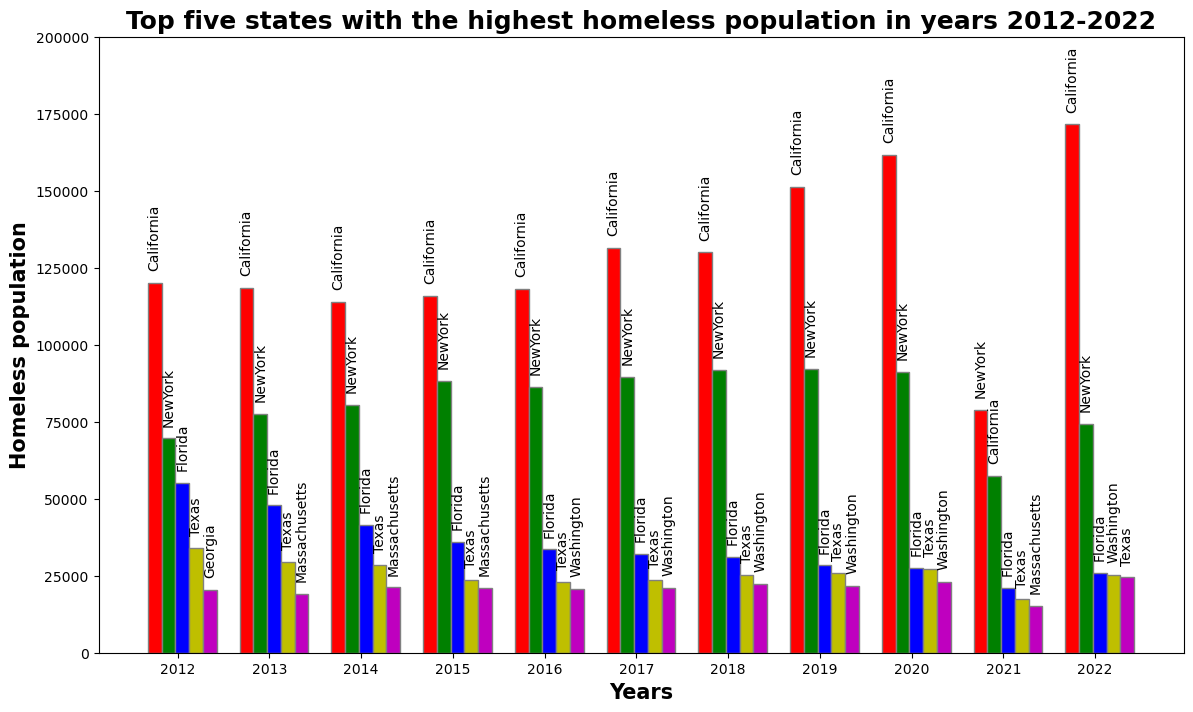

In [8]:
# PART 5
# PLOT DIAGRAM

# set width of bar 
barWidth = 0.15

fig, ax = plt.subplots(figsize =(14, 8)) 
 
# transposition of data about 5 states with the highest counts of homelessness for years 2012-202
states5_hp_D = []
states5_D = []

for j in range(len(states5_hp[0])):
    states5_hp_D.append([])
    states5_D.append([])
    for i in range(len(states5_hp)):
        states5_hp_D[j].append(states5_hp[i][j])
        states5_D[j].append(states5[i][j])

# set positions of bars
BR = []
for i in range(len(states5_hp_D)):
    BR.append([])
    if i == 0:    
        for j in range(11):
            BR[i].append(j)
    else:
        for j in range(11):
            BR[i].append(BR[i-1][j]+barWidth)
        

# Create the plot
B = []
colors = ['r', 'g', 'b', 'y', 'm']
for i in range(len(states5_hp_D)):
    b = plt.bar(BR[i], states5_hp_D[i], color = colors[i], width = barWidth, edgecolor ='grey', label ='IT')
    B.append(b)

# sign bars with names of states
for b in range(len(B)):
    for i in range(len(B[b])):
        yval = B[b][i].get_height()
        plt.text(B[b][i].get_x() + B[b][i].get_width() / 2.0, yval + 5000, states5_D[b][i], rotation = 90, ha="center")

# sign Y axis
plt.xticks([r + 0.25 for r in range(len(years))],
          ['2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])

# create lables and title
plt.xlabel('Years', fontweight ='bold', fontsize = 15) 
plt.ylabel('Homeless population', fontweight ='bold', fontsize = 15) 
plt.title('Top five states with the highest homeless population in years 2012-2022', fontweight ='bold', fontsize = 18)

# Y axis limit
plt.ylim([0, 200000])

plt.savefig("top_five_homelessness_diagram.png") 
plt.show()